In [64]:
from matplotlib.pyplot import scatter, title, xlabel, ylabel, figure, title
from seaborn import set
set()
from pandas import read_csv
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [65]:
# Read csv file 
packages_df = read_csv('datasets/Packstücke.csv', sep=';', header=0)  

# Show first ten rows of dataframe 
packages_df.head(10)

,Package No,Shipment No,Gross Weight (kg),Width (cm),Height (cm),Length (cm)
0,1007530-2011-03239,1000088,23,35,30,35
1,1007530-2011-03241,1000310,150,60,55,80
2,1007530-2011-03242,1000346,"0,5",14,15,19
3,1007530-2011-03243,1000456,"1,5",20,20,29
4,1007530-2011-03244,1000796,1,10,10,10
5,1007530-2011-03245,1000957,75,82,81,120
6,1007530-2011-03246,1000957,41,80,34,120
7,1007530-2011-03247,1001184,"1,34",220,112,406
8,1007530-2011-03249,1001408,"0,5",20,20,29
9,1007530-2011-03250,1001563,5,45,35,45


In [66]:
# Show data types of columns
packages_df.dtypes

Package No           object
Shipment No           int64
Gross Weight (kg)    object
Width (cm)           object
Height (cm)           int64
Length (cm)           int64
dtype: object

In [67]:
#
packages_df[["Package No", "Shipment No"]] = packages_df[["Package No", "Shipment No"]].astype(str)

# Drop not needed cols
x = packages_df.drop(["Package No", "Shipment No"], axis=1)

# Replace ',' with '.' (us standard)
x["Gross Weight (kg)"] = x.apply(lambda row: str(row["Gross Weight (kg)"]).replace(",", "."), axis=1)
x["Width (cm)"] = x.apply(lambda row: str(row["Width (cm)"]).replace(",", "."), axis=1)

# Convert to correct data type
x[["Gross Weight (kg)", "Width (cm)"]] = x[["Gross Weight (kg)", "Width (cm)"]].astype(float)
x[["Height (cm)", "Length (cm)"]] = x[["Height (cm)", "Length (cm)"]].astype(int)

# Calculate volume of each row
x["Volume (cm³)"] = x.apply(lambda row: row["Width (cm)"] * row["Height (cm)"] * row["Length (cm)"], axis=1)
x.head(10)

,Gross Weight (kg),Width (cm),Height (cm),Length (cm),Volume (cm³)
0,23.00,35.0,30,35,36750.0
1,150.00,60.0,55,80,264000.0
2,0.50,14.0,15,19,3990.0
3,1.50,20.0,20,29,11600.0
4,1.00,10.0,10,10,1000.0
5,75.00,82.0,81,120,797040.0
6,41.00,80.0,34,120,326400.0
7,1.34,220.0,112,406,10003840.0
8,0.50,20.0,20,29,11600.0
9,5.00,45.0,35,45,70875.0


Text(0, 0.5, 'Volume (cm³)')

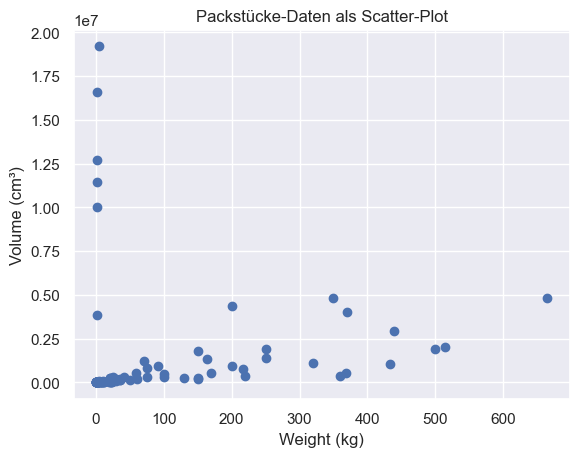

In [68]:
# Plot data as scatter  
scatter(x["Gross Weight (kg)"].to_numpy(), x["Volume (cm³)"].to_numpy())
title("Packstücke-Daten als Scatter-Plot")
xlabel("Weight (kg)")
ylabel("Volume (cm³)")

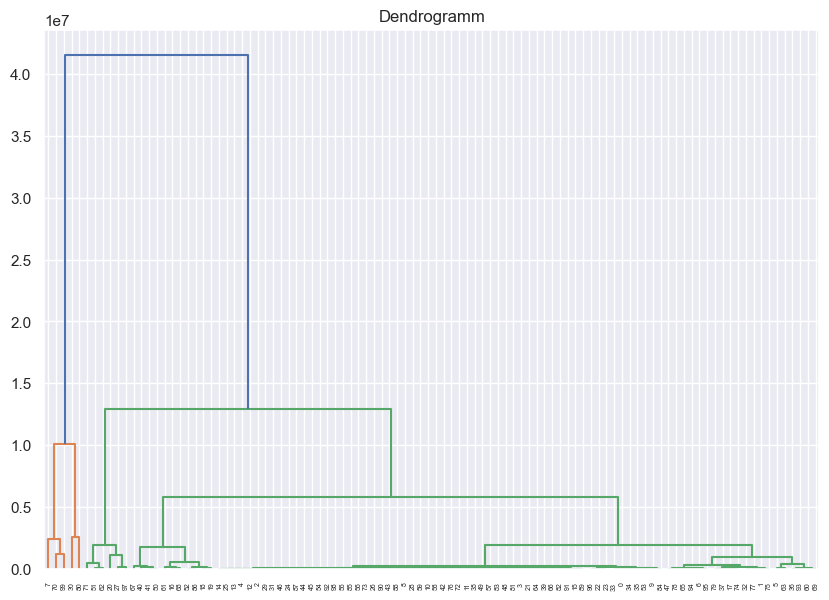

In [69]:
figure(figsize=(10, 7))
title("Dendrogramm")
dend = dendrogram(linkage(x, method='ward'))

In [70]:
# hierarchisches Modell festlegen, inkl. Anzahl der Cluster
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')

# Vorhersage mittels des hierarchischen Modells
cluster = cluster.fit(x)
y_cluster = cluster.fit_predict(x)

# vorhergesagte Zuordnungen der Merkmalskombinationen zu den geschätzten Zentren
y_cluster #or:
# print(cluster.labels_)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0], dtype=int64)

Text(0, 0.5, 'Temperatur (°C)')

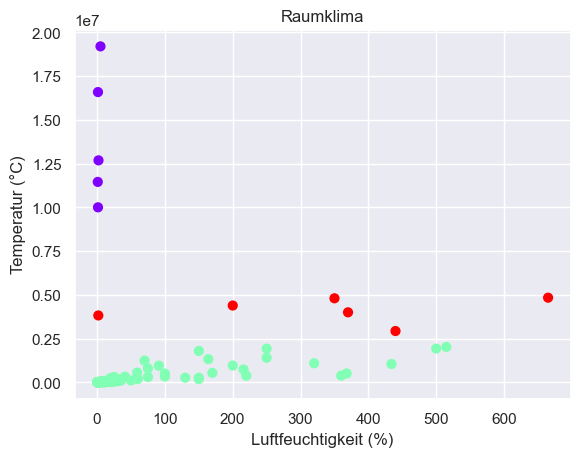

In [71]:
# Daten visualisieren: Merkmale
scatter(x["Gross Weight (kg)"].to_numpy(), x["Volume (cm³)"].to_numpy(), c=cluster.labels_, s=40, cmap='rainbow')

title("Raumklima")
xlabel("Luftfeuchtigkeit (%)")
ylabel("Temperatur (°C)")

In [72]:
# Texterkennung?